## K - Nearest Neighbours 

This notebook demonstrates the classification usage of K - Nearest Neighbours and selection of best K value using error method

In [88]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [89]:
#Import Dataset and Feature Scaling
dataset = pd.read_csv('Classified Data',index_col=0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [90]:
#Standarize the features values as K-Nearest Neighbours depend upon the distance of K target.
#More variation of feature values must be eliminated.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [91]:
sc.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
scaled_features = sc.transform(dataset.drop('TARGET CLASS',axis=1))

In [93]:
dataset_scaled = pd.DataFrame(scaled_features,columns=dataset.columns[:-1])

In [94]:
dataset_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [95]:
#Splitting dataset to test case and train case
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset_scaled,dataset['TARGET CLASS'],test_size=0.30)

In [96]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [97]:
#Prediction for our test case
y_pred = knn.predict(X_test)

In [98]:
#Evaluate our model using Confusion matrix and classification accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
print(confusion_matrix(y_test,y_pred))

[[134  20]
 [ 11 135]]


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       154
           1       0.87      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [101]:
#Choosing K value using elbow method to pick good K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [102]:
error_rate

[0.10333333333333333,
 0.1,
 0.08,
 0.07,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08,
 0.07333333333333333,
 0.09,
 0.08666666666666667,
 0.08333333333333333,
 0.08,
 0.08,
 0.08333333333333333,
 0.08,
 0.08333333333333333,
 0.07333333333333333,
 0.08333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.08333333333333333,
 0.08,
 0.08,
 0.07666666666666666,
 0.07,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.07,
 0.07333333333333333,
 0.07]

Text(0, 0.5, 'Error Rate')

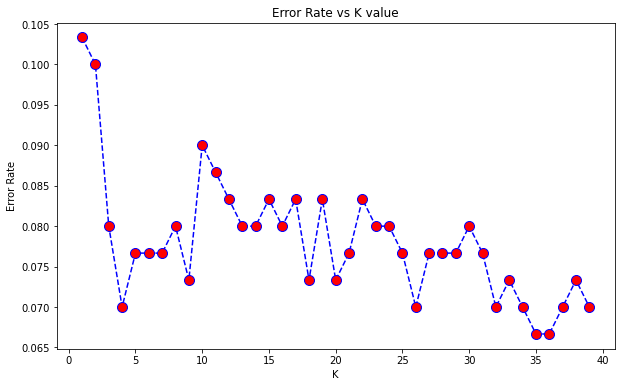

In [103]:
#Lets plot error_rate using matplotlib 
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor= 'red', markersize=10 )
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [104]:
#If K > 25 error rate is pretty low. Lets use the K value and see the results
#For comparison, lets see for K=1 first
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_test,y_test)
y_pred = knn.predict(X_test)

print("WITH K=1 \n")
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report : ")
print(classification_report(y_test,y_pred))

WITH K=1 

Confusion Matrix : 
[[154   0]
 [  0 146]]


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [105]:
#Now with K =23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_test,y_test)
y_pred = knn.predict(X_test)

print("WITH K=23 \n")
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report : ")
print(classification_report(y_test,y_pred))

WITH K=23 

Confusion Matrix : 
[[144  10]
 [  9 137]]


Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       154
           1       0.93      0.94      0.94       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

